In [168]:
# importing the different libraries required for the model
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [169]:
# converting the dataframe into csv
df=pd.read_csv(r"D:\datasets2\insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [170]:
# printing the correlation between different variables
correlation=df.corr()
correlation

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


In [171]:
# diving the independent variable and target variable
X=df[['age']]
y=df['bought_insurance']

In [172]:
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [173]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [174]:
# using the logistic regresssion for predicting the outcome
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [175]:
# predicting the outcome for X
predictions=model.predict(X)

In [176]:
print(predictions)

[0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0]


In [177]:
# printing the accuracy score for the model
print(accuracy_score(y,predictions))

0.8888888888888888


In [178]:
# coverting the iris dataset into dataframe
df2=pd.read_csv(r"C:\Users\DELL\Downloads\archive\iris.data.csv",names=("Petal Length","Petal Width", "Sepal Length", "Sepal Width","category"))
df2

,Petal Length,Petal Width,Sepal Length,Sepal Width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


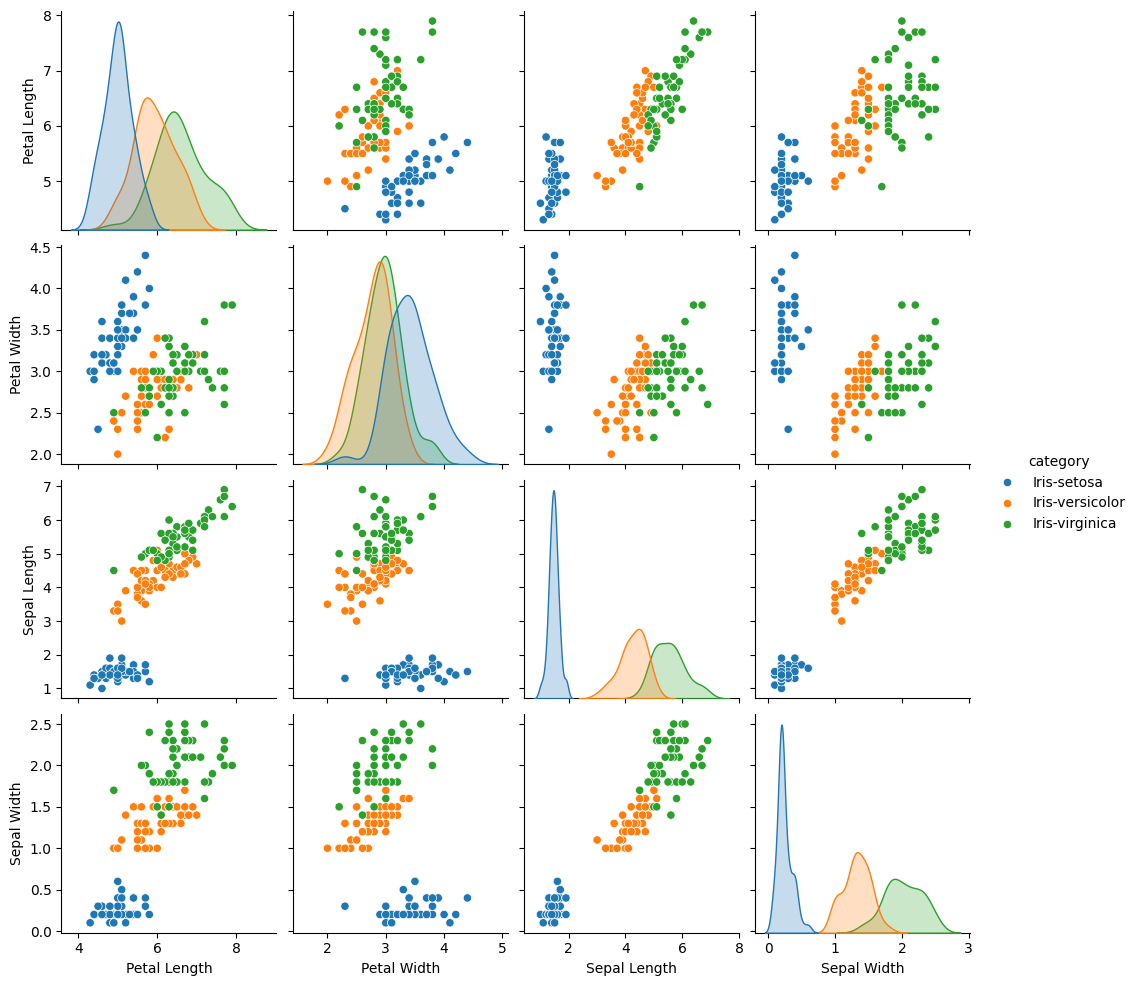

In [179]:
# using the pairplot for finding the relationship between diffferent variables
sns.pairplot(data=df2,hue='category')

In [180]:
# using the labelencoding the target variable
encoder=LabelEncoder()
df2['category']=encoder.fit_transform(df2['category'])

In [181]:
# getting the inter quantile range for different varables
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
print(iqr)

Petal Length    5.1
Petal Width     2.8
Sepal Length    1.6
Sepal Width     0.3
category        0.0
Name: 0.25, dtype: float64
Petal Length    6.4
Petal Width     3.3
Sepal Length    5.1
Sepal Width     1.8
category        2.0
Name: 0.75, dtype: float64
Petal Length    1.3
Petal Width     0.5
Sepal Length    3.5
Sepal Width     1.5
category        2.0
dtype: float64


In [182]:
# removing the outliers using the from the dataset using the following code
df2=df2[~((df2<(q1-1.5*iqr)) | (df2 > (q3 + 1.5*iqr))).any(axis=1)]
df2

,Petal Length,Petal Width,Sepal Length,Sepal Width,category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [184]:
# dividing the dataset into independent variables and target variable
y=df2['category']
X=df2.drop(['category'],axis=1)


In [185]:
# dividing into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=101)

In [186]:
# using the logicstic regression for the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [187]:
# using the model for geting the predictions fro test and train data
predictions_train=model.predict(xtrain)
predictions_test=model.predict(xtest)

In [188]:
# printing the accuracy score for both ytrain and ytest
print(accuracy_score(ytrain,predictions_train))
print(accuracy_score(ytest,predictions_test))

0.9803921568627451
0.9772727272727273
